In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
%matplotlib inline
from scipy.stats import norm
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense,Layer,Lambda,Add,Multiply,Input,Conv2D,MaxPool2D,Flatten,Conv2DTranspose,Reshape,Dropout,GlobalAveragePooling2D,GaussianNoise
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mse
import pandas as pd
import shutil
from skimage.filters import threshold_local

In [ ]:
'''dataset_path = "/content/drive/My Drive/MTP-phase1/testO15.zip"
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")
zip_object.extractall("/content/drive/My Drive/MTP-phase1")
zip_object.close()'''

In [ ]:
X_train_path = "/content/drive/My Drive/MTP-phase1/X_train/"
y_train_path = "/content/drive/My Drive/MTP-phase1/y_train/"
X_test_path = "/content/drive/My Drive/MTP-phase1/X_test/"
y_test_path = "/content/drive/My Drive/MTP-phase1/y_test/"

In [ ]:
X_train_list = os.listdir(path=X_train_path+'.')
y_train_list = os.listdir(path=y_train_path+'.')
X_test_list = os.listdir(path=X_test_path+'.')
y_test_list = os.listdir(path=y_test_path+'.')

In [ ]:
X_train_list.sort()
y_train_list.sort()
print(X_train_list[1:10])
print(y_train_list[1:10])

['H1010.png', 'H10100.png', 'H10101.png', 'H10102.png', 'H10103.png', 'H10104.png', 'H10105.png', 'H10106.png', 'H10107.png']
['O1010.png', 'O10100.png', 'O10101.png', 'O10102.png', 'O10103.png', 'O10104.png', 'O10105.png', 'O10106.png', 'O10107.png']


In [ ]:
X_test_list.sort()
y_test_list.sort()
print(X_test_list[:10])
print(y_test_list[:10])

['H151.png', 'H1510.png', 'H15100.png', 'H1511.png', 'H1512.png', 'H1513.png', 'H1514.png', 'H1515.png', 'H1516.png', 'H1517.png']
['O151.png', 'O1510.png', 'O15100.png', 'O1511.png', 'O1512.png', 'O1513.png', 'O1514.png', 'O1515.png', 'O1516.png', 'O1517.png']


#Loading training data into Tensors

In [ ]:
'''X_train = np.zeros((1,64,64,1))
y_train = np.zeros((1,64,64,1))
i = 0
for a,b in zip(X_train_list,y_train_list):
    if i%100==0:
        print(i,end=" ")
    i+=1
    imx = load_img(path=X_train_path+a,color_mode='grayscale')
    imy = load_img(path=y_train_path+b,color_mode='grayscale')
    imx = np.asarray(imx).reshape(1,64,64,1)
    imy = np.asarray(imy).reshape(1,64,64,1)
    X_train = np.concatenate((X_train,imx),axis=0)
    y_train = np.concatenate((y_train,imy),axis=0)'''

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 

In [ ]:
'''np.save('/content/drive/My Drive/MTP-phase1/X_train_arr',X_train)
np.save('/content/drive/My Drive/MTP-phase1/y_train_arr',y_train)'''

In [ ]:
X_train = np.load('/content/drive/My Drive/MTP-phase1/X_train_arr.npy')
y_train = np.load('/content/drive/My Drive/MTP-phase1/y_train_arr.npy')

In [ ]:
y_train.shape

(5001, 64, 64, 1)

#Loading Testing data in Tensor

In [ ]:
X_test = np.zeros((1,64,64,1))
y_test = np.zeros((1,64,64,1))
i = 0
for a,b in zip(X_test_list,y_test_list):
    if i%10==0:
        print(i,end=" ")
    i+=1
    imx = load_img(path=X_test_path+a,color_mode='grayscale')
    imy = load_img(path=y_test_path+b,color_mode='grayscale')
    imx = np.asarray(imx).reshape(1,64,64,1)
    imy = np.asarray(imy).reshape(1,64,64,1)
    X_test = np.concatenate((X_test,imx))
    y_test = np.concatenate((y_test,imy))

0 10 20 30 40 50 60 70 80 90 

##Normalizing data

In [ ]:
X_train = X_train[1:]#/255.
X_test = X_test[1:]#/255.
y_train = y_train[1:]#/255.
y_test = y_test[1:]#/255.

In [ ]:
X_train.shape

(5000, 64, 64, 1)

## Building CNN- Autoencoder

#### using Keras-functional-API

In [ ]:
shap = (64,64,1)
'''inp = Input(shape=shap)
d1 = Conv2D(filters=4,kernel_size=3,strides=2,activation='relu',padding='same')(inp)
d3 = Conv2D(filters=8,kernel_size=3,strides=2,activation='relu',padding='same')(d1)
e2 = Conv2DTranspose(filters=4,kernel_size=3,strides=2,activation='relu',padding='same')(d3)
e3 = Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='relu',padding='same')(e2)
model = Model(inp,e3)'''
inp = Input(shape=shap)
d1 = Conv2D(filters=20,kernel_size=3,strides=2,activation='relu',padding='same')(inp)
e1 = Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='relu',padding='same')(d1)
model = Model(inp,e1)

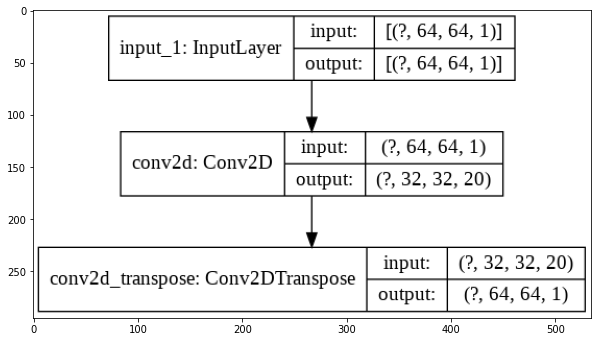

In [ ]:
#model = Model(inp,e3)
plot_model(model,to_file='model.png',show_shapes=True)
data = plt.imread('model.png')
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')
plt.show()

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 20)        200       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 64, 64, 1)         181       
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss="mse",metrics=['mse'])

In [ ]:
training = model.fit(X_train,y_train,batch_size=16,epochs=500,validation_data=(X_test,y_test),workers=-1,use_multiprocessing=True)

Epoch 1/500
313/313 [==============================] - 1s 3ms/step - loss: 5723.5122 - mse: 5723.5122 - val_loss: 277.8693 - val_mse: 277.8693
Epoch 2/500
313/313 [==============================] - 1s 2ms/step - loss: 73.1532 - mse: 73.1532 - val_loss: 120.4422 - val_mse: 120.4422
Epoch 3/500
313/313 [==============================] - 1s 2ms/step - loss: 43.6621 - mse: 43.6621 - val_loss: 111.7998 - val_mse: 111.7998
Epoch 4/500
313/313 [==============================] - 1s 2ms/step - loss: 41.1596 - mse: 41.1596 - val_loss: 107.2038 - val_mse: 107.2038
Epoch 5/500
313/313 [==============================] - 1s 3ms/step - loss: 39.5592 - mse: 39.5592 - val_loss: 104.0366 - val_mse: 104.0366
Epoch 6/500
313/313 [==============================] - 1s 3ms/step - loss: 38.4851 - mse: 38.4851 - val_loss: 102.1638 - val_mse: 102.1638
Epoch 7/500
313/313 [==============================] - 1s 3ms/step - loss: 37.6843 - mse: 37.6843 - val_loss: 100.3956 - val_mse: 100.3956
Epoch 8/500
313/313 [==

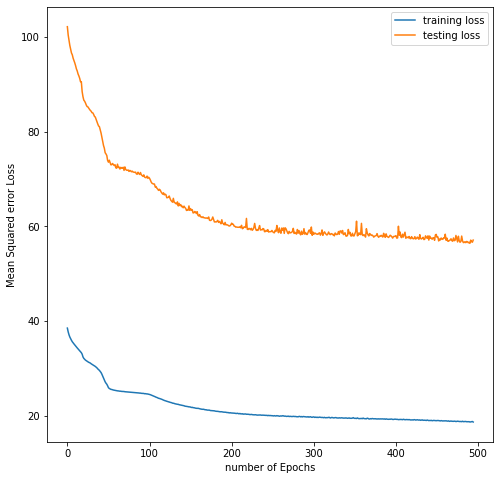

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(training.history['loss'][5:])
plt.plot(training.history['val_loss'][5:])
plt.legend(['training loss','testing loss'])
plt.xlabel('number of Epochs')
plt.ylabel('Mean Squared error Loss')
plt.savefig('Loss_image')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

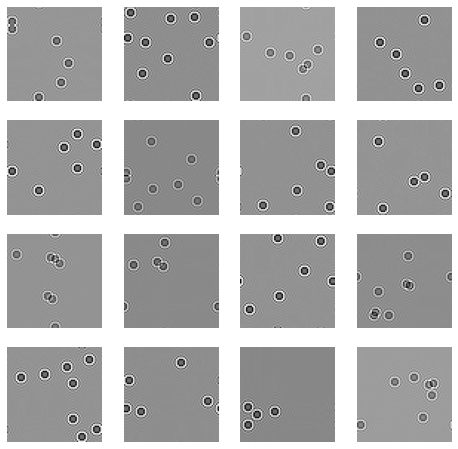

In [ ]:
# Train data
fig = plt.figure(figsize=(8,8))

for i in range(16):
    test = X_train[i*30].reshape(64,64)
    plt.subplot(4,4,i+1)
    plt.imshow(test,cmap='gray')
    plt.axis('off')
#plt.title("Training Holograms")
plt.savefig('train_pics')
plt.show()



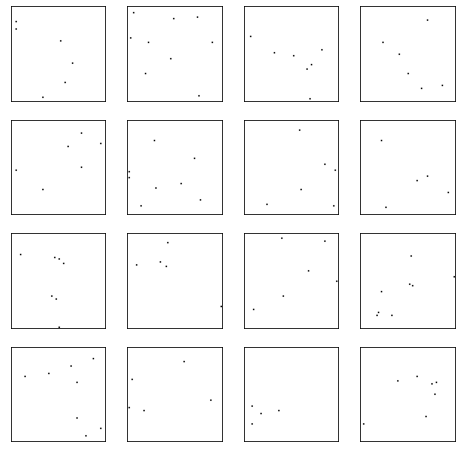

In [ ]:
# Train label data
fig = plt.figure(figsize=(8,8))

for i in range(16):
    test = y_train[i*30].reshape(64,64)
    plt.subplot(4,4,i+1)
    plt.imshow(test,cmap='gray')
    plt.axis('image')
    plt.xticks([])
    plt.yticks([])
    
#plt.title("Training Holograms")
plt.savefig('train_labels')

plt.show()

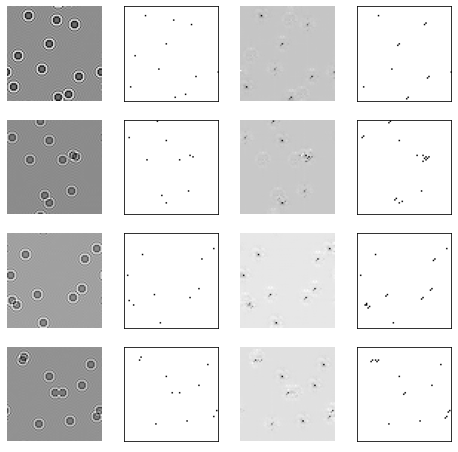

In [ ]:
fig = plt.figure(figsize=(8,8))
#fig,axes = plt.subplots(4,4)
for i in range(4):
    xte = X_test[i+10].reshape(64,64) #X_test image
    yte = y_test[i+10].reshape(64,64) #y_test image
    cnn = y_pred[i+10].reshape(64,64) #output of the CNN
    local_thresh = threshold_local(cnn,block_size,offset=25)
    fin = cnn > local_thresh         # final output after local thresholding

    plt.subplot(4,4,i*4+1)
    plt.imshow(xte,cmap='gray')
    plt.axis('off')

    plt.subplot(4,4,i*4+2)
    plt.imshow(yte,cmap='gray')
    plt.axis('image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4,4,i*4+3)
    plt.imshow(cnn,cmap='gray')
    plt.axis('off')

    plt.subplot(4,4,i*4+4)
    plt.imshow(fin,cmap='gray')
    plt.axis('image')
    plt.xticks([])
    plt.yticks([])
plt.savefig('output_pic')
plt.show()